In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
df = pd.read_excel("dataset.xlsx", sheet_name="Sheet1")  # Load Excel file
print(df.head())  # Display first 5 rows
df.drop(columns=["MSSV", "Họ và tên SV"], inplace=True)  # Delete specific column
df.to_csv("output.csv", index=False)  # Save as CSV without index
df.to_excel("output.xlsx", index=False, sheet_name="Processed")  # Save as Excel

        MSSV    Họ và tên SV   KT1   KT2   KT3  KT_TB    BC  Bonus  QT_x  \
0  202421640   NGUYỄN THU AN  8.11  7.00  6.75   7.29  9.25   0.25  8.52   
1  202413979      ĐÀO LÊ ANH  8.78  4.33  4.50   5.87  8.25   0.75  7.81   
2  202413943     ĐỖ HỒNG ANH  9.33  8.67  7.25   8.42  8.00   0.50  8.71   
3  202413955   DƯƠNG HẢI ANH  9.00  0.00  4.42   4.47  7.75   0.50  6.61   
4  202413967  KHỔNG TÙNG ANH  7.67  0.00  3.84   3.84  5.25   0.00  4.55   

   QT_y   CK  HP_grade  
0   8.5  7.5       7.8  
1   8.0  7.5       7.7  
2   8.5  9.5       9.2  
3   6.5  5.5       5.8  
4   4.5  5.5       5.2  


In [3]:
df = pd.read_csv("output.csv")  # Load CSV file

In [4]:
# Display the number of rows and columns
print(df.shape)
print(df.head())
print(df.info())  # Display data type of each column
print(df.describe())  # Display statistical information of numerical columns
print(df.isnull().sum())  # Check for missing values
print(df.duplicated().sum())  # Check for duplicates
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

(164, 10)
    KT1   KT2   KT3  KT_TB    BC  Bonus  QT_x  QT_y   CK  HP_grade
0  8.11  7.00  6.75   7.29  9.25   0.25  8.52   8.5  7.5       7.8
1  8.78  4.33  4.50   5.87  8.25   0.75  7.81   8.0  7.5       7.7
2  9.33  8.67  7.25   8.42  8.00   0.50  8.71   8.5  9.5       9.2
3  9.00  0.00  4.42   4.47  7.75   0.50  6.61   6.5  5.5       5.8
4  7.67  0.00  3.84   3.84  5.25   0.00  4.55   4.5  5.5       5.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       164 non-null    float64
 1   KT2       162 non-null    float64
 2   KT3       161 non-null    float64
 3   KT_TB     164 non-null    float64
 4   BC        164 non-null    float64
 5   Bonus     164 non-null    float64
 6   QT_x      164 non-null    float64
 7   QT_y      164 non-null    float64
 8   CK        164 non-null    float64
 9   HP_grade  164 non-null    float64
dtypes: float64

(array([ 1.,  2.,  0.,  0.,  0.,  0.,  1.,  3.,  6.,  7., 16., 16., 20.,
        14., 22., 28., 14.,  5.,  8.,  1.]),
 array([1.7, 2.1, 2.5, 2.9, 3.3, 3.7, 4.1, 4.5, 4.9, 5.3, 5.7, 6.1, 6.5,
        6.9, 7.3, 7.7, 8.1, 8.5, 8.9, 9.3, 9.7]),
 <BarContainer object of 20 artists>)

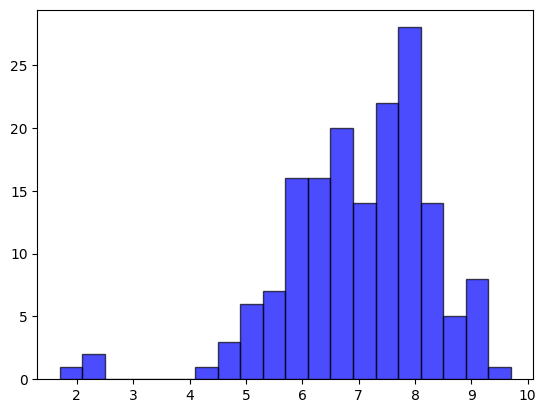

In [5]:
plt.hist(df["HP_grade"], bins=20, color="blue", edgecolor="black", alpha=0.7)

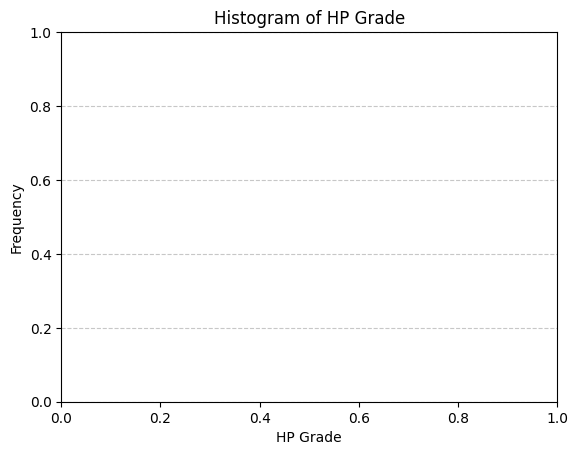

In [ ]:
# Formatting
plt.xlabel("HP Grade")
plt.ylabel("Frequency")
plt.title("Histogram of HP Grade")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Show the plot


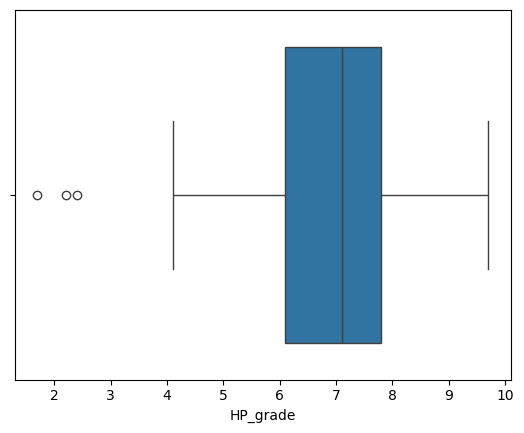

In [8]:
sns.boxplot(x=df["HP_grade"])
plt.show()

In [9]:
df = df[df["HP_grade"] >= 3]

(array([ 1.,  0.,  3.,  6.,  3.,  6., 14., 12., 12., 12., 11., 16., 19.,
        18.,  6., 10.,  3.,  7.,  1.,  1.]),
 array([4.1 , 4.38, 4.66, 4.94, 5.22, 5.5 , 5.78, 6.06, 6.34, 6.62, 6.9 ,
        7.18, 7.46, 7.74, 8.02, 8.3 , 8.58, 8.86, 9.14, 9.42, 9.7 ]),
 <BarContainer object of 20 artists>)

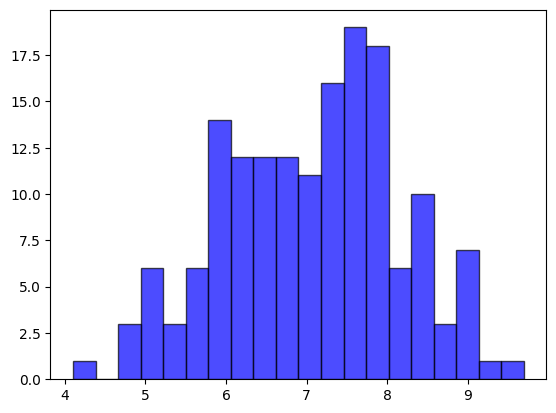

In [10]:
plt.hist(df["HP_grade"], bins=20, color="blue", edgecolor="black", alpha=0.7)

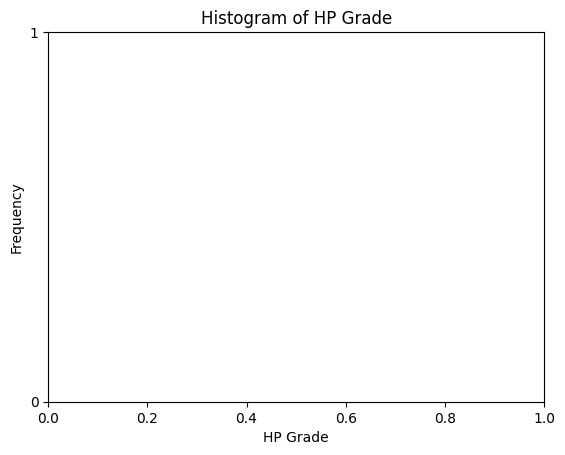

In [11]:
# Formatting
plt.xlabel("HP Grade")
plt.ylabel("Frequency")
plt.title("Histogram of HP Grade")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [12]:
plt.show()

array([[<Axes: title={'center': 'KT1'}>, <Axes: title={'center': 'KT2'}>,
        <Axes: title={'center': 'KT3'}>],
       [<Axes: title={'center': 'KT_TB'}>,
        <Axes: title={'center': 'BC'}>,
        <Axes: title={'center': 'Bonus'}>],
       [<Axes: title={'center': 'QT_x'}>,
        <Axes: title={'center': 'QT_y'}>, <Axes: title={'center': 'CK'}>],
       [<Axes: title={'center': 'HP_grade'}>, <Axes: >, <Axes: >]],
      dtype=object)

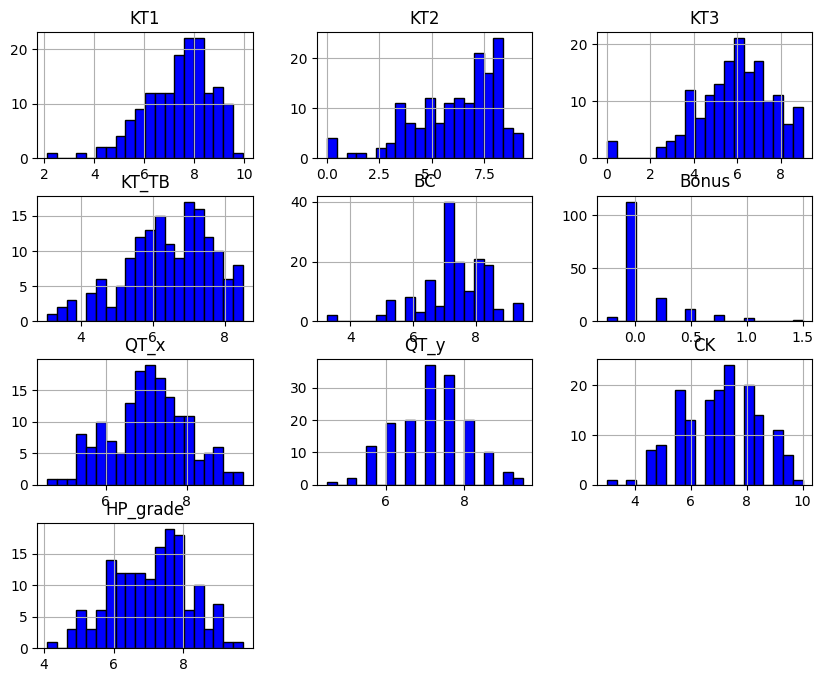

In [13]:
# Create subplots for all numeric columns
df.select_dtypes(include=["number"]).hist(
    bins=20, figsize=(10, 8), color="blue", edgecolor="black"
)

In [14]:
# Ensure y-axis is whole numbers
for ax in plt.gcf().axes:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

<Figure size 640x480 with 0 Axes>

In [15]:
plt.suptitle("Histograms of All Numeric Columns", fontsize=14)
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
corr_matrix = df.corr()
# Set figure size
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

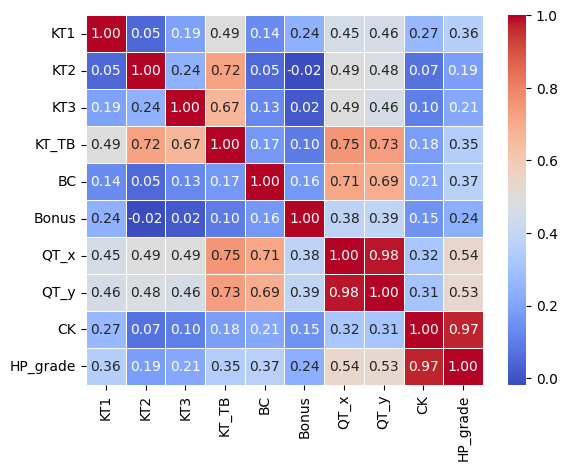

In [17]:
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

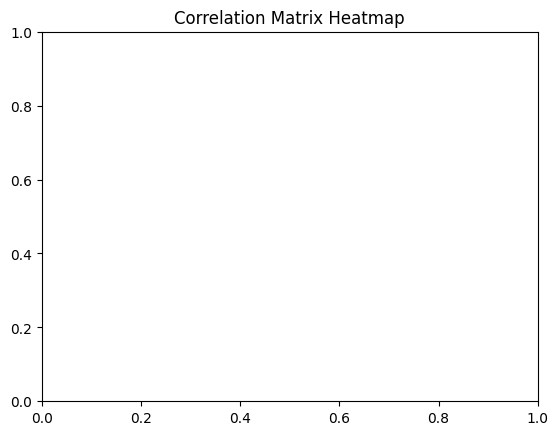

In [18]:
# Add title
plt.title("Correlation Matrix Heatmap")

In [19]:
# Show plot
plt.show()

KT1            Axes(0.125,0.53;0.133621x0.35)
KT2         Axes(0.285345,0.53;0.133621x0.35)
KT3          Axes(0.44569,0.53;0.133621x0.35)
KT_TB       Axes(0.606034,0.53;0.133621x0.35)
BC          Axes(0.766379,0.53;0.133621x0.35)
Bonus          Axes(0.125,0.11;0.133621x0.35)
QT_x        Axes(0.285345,0.11;0.133621x0.35)
QT_y         Axes(0.44569,0.11;0.133621x0.35)
CK          Axes(0.606034,0.11;0.133621x0.35)
HP_grade    Axes(0.766379,0.11;0.133621x0.35)
dtype: object

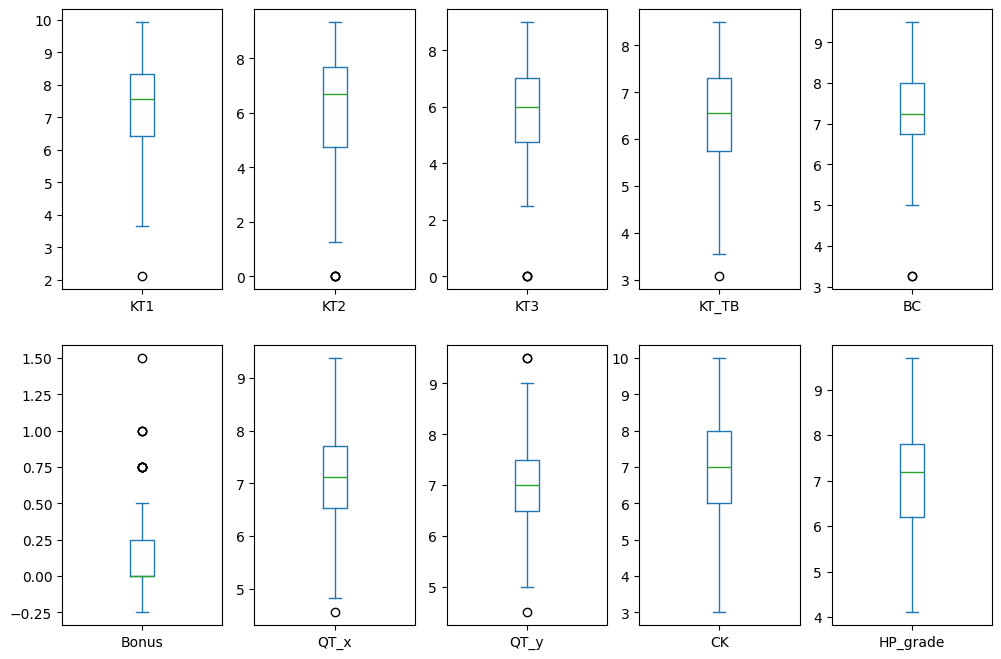

In [20]:
# Loop through numeric columns and create individual boxplots
df.select_dtypes(include=["number"]).plot(
    kind="box",
    subplots=True,
    layout=(2, 5),
    figsize=(12, 8),
    sharex=False,
    sharey=False,
)

In [21]:
plt.suptitle("Boxplots of Each Numeric Column")
plt.show()

<Figure size 640x480 with 0 Axes>

In [22]:
df = df[df["QT_x"] >= 3]
df = df[df["KT3"] >= 2]
df = df[df["KT1"] >= 3]
df = df[df["BC"] >= 4]

KT1            Axes(0.125,0.53;0.133621x0.35)
KT2         Axes(0.285345,0.53;0.133621x0.35)
KT3          Axes(0.44569,0.53;0.133621x0.35)
KT_TB       Axes(0.606034,0.53;0.133621x0.35)
BC          Axes(0.766379,0.53;0.133621x0.35)
Bonus          Axes(0.125,0.11;0.133621x0.35)
QT_x        Axes(0.285345,0.11;0.133621x0.35)
QT_y         Axes(0.44569,0.11;0.133621x0.35)
CK          Axes(0.606034,0.11;0.133621x0.35)
HP_grade    Axes(0.766379,0.11;0.133621x0.35)
dtype: object

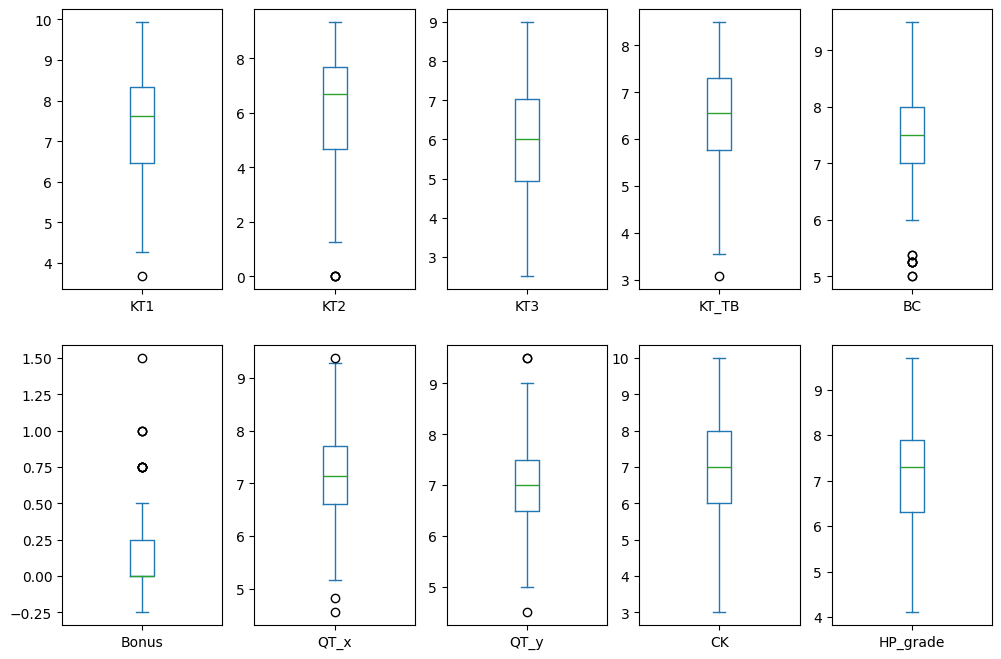

In [23]:
df.select_dtypes(include=["number"]).plot(
    kind="box",
    subplots=True,
    layout=(2, 5),
    figsize=(12, 8),
    sharex=False,
    sharey=False,
)

In [24]:
plt.suptitle("Boxplots of Each Numeric Column")
plt.show()

<Figure size 640x480 with 0 Axes>

In [25]:
df.to_csv("processed_data.csv", index=False)  # Save processed data to CSV